
We are going to create time series forecasting using TensorFlow.    


It builds a few different styles of models including Convolutional and Recurrent Neural Networks (CNNs and RNNs).

## <u> Libraries

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

We give to colab access to our drive to collect the file with the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
excel_file_path = "/content/drive/MyDrive/GoldenDataFrameWithoutCluster.csv"

In [ ]:
data = pd.read_csv(excel_file_path)

In [ ]:
data

,Unnamed: 0,Unnamed,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,0,14098,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,1,14099,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,2,14100,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,3,14101,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,4,14102,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...,...,...
20900,20900,14701,OWID_CIS,2002,NaN,NaN,4.169948e-04,NaN,NaN,NaN
20901,20901,14702,OWID_CIS,2003,NaN,NaN,4.211831e-04,NaN,NaN,NaN
20902,20902,14703,OWID_CIS,2004,NaN,NaN,4.381676e-04,NaN,NaN,NaN
20903,20903,14704,OWID_CIS,2005,NaN,NaN,4.553510e-04,NaN,NaN,NaN


In [ ]:
#we delete few columns
data = data.drop(data.columns[0], axis = 1)
data = data.drop(data.columns[0], axis = 1)
data = data.dropna()
data

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...
20570,HRV,2017,0.000015,0.083368,3.257590e-03,0.144623,0.887248,0.367510
20571,HRV,2018,0.000014,0.088788,3.257590e-03,0.138443,0.889933,0.367510
20572,HRV,2019,0.000014,0.088998,3.257590e-03,0.131026,0.895302,0.367510
20573,HRV,2020,0.000013,0.088308,3.257590e-03,0.101360,0.885906,0.367510


In [ ]:
# we select a country
data = data[data.Code == 'AFG']
initial = data
data

,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
19064,AFG,1950,0.012906,0.801027,0.000009,0.908529,0.210738,0.035952
19065,AFG,1951,0.012906,0.802407,0.000009,0.908529,0.214765,0.035952
19066,AFG,1952,0.012906,0.802469,0.000009,0.908529,0.220134,0.035952
19067,AFG,1953,0.012906,0.803220,0.000009,0.908529,0.226846,0.035952
19068,AFG,1954,0.012906,0.801742,0.000009,0.908529,0.230872,0.035952
...,...,...,...,...,...,...,...,...
19131,AFG,2017,0.006147,0.736124,0.000520,0.822002,0.684564,0.121505
19132,AFG,2018,0.005936,0.736124,0.000520,0.813350,0.685906,0.121505
19133,AFG,2019,0.005750,0.736124,0.000520,0.805933,0.692617,0.121505
19134,AFG,2020,0.005565,0.736124,0.000520,0.817058,0.679195,0.121505


# Evolution of some indicators

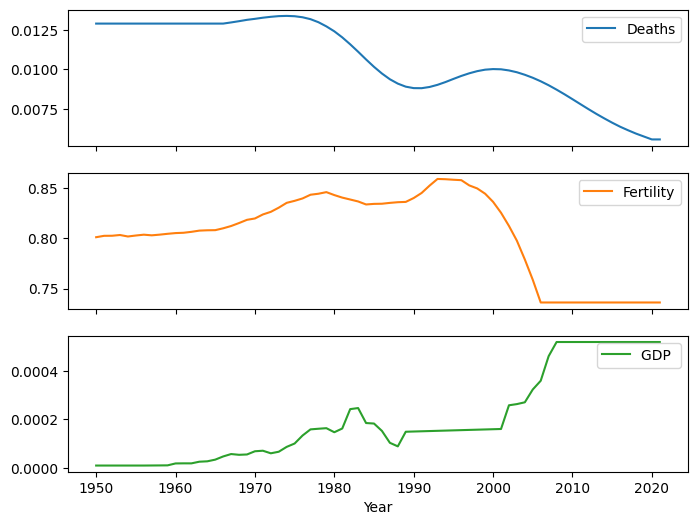

In [ ]:

# we plot the evolution of three different normalized indicators throught the years

#we select the columns
plot_cols = ['Deaths', 'Fertility', 'GDP ']

# we define values for the Y axis
plot_features = data[plot_cols]

# we define values for the X axis
plot_features.index = data['Year']

# we plpot the three graphs
_ = plot_features.plot(subplots=True)


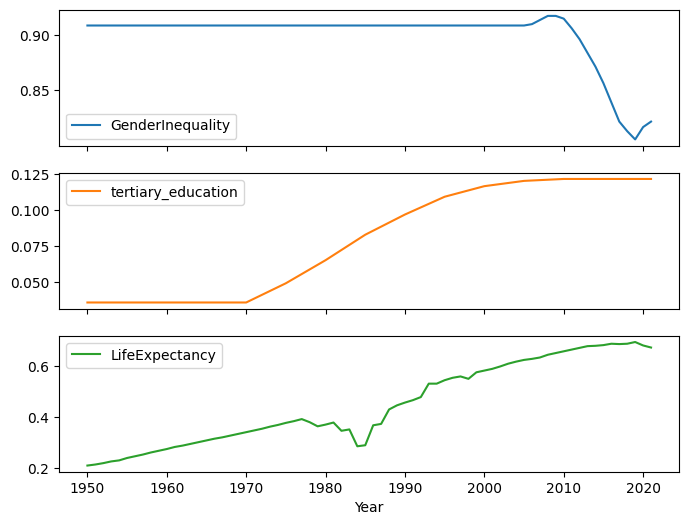

In [ ]:
# we plot the evolution of three different normalized indicators throught the years

#we select the columns
plot_cols = ['GenderInequality', 'tertiary_education', 'LifeExpectancy']

# we define values for the Y axis
plot_features = data[plot_cols]

# we define values for the X axis
plot_features.index = data['Year']

# we plpot the three graphs
_ = plot_features.plot(subplots=True)

In [ ]:
# we keep only the indicators in the dataframe
data = data.drop(data.columns[0], axis = 1)
data = data.drop(data.columns[0], axis = 1)
data

,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
19064,0.012906,0.801027,0.000009,0.908529,0.210738,0.035952
19065,0.012906,0.802407,0.000009,0.908529,0.214765,0.035952
19066,0.012906,0.802469,0.000009,0.908529,0.220134,0.035952
19067,0.012906,0.803220,0.000009,0.908529,0.226846,0.035952
19068,0.012906,0.801742,0.000009,0.908529,0.230872,0.035952
...,...,...,...,...,...,...
19131,0.006147,0.736124,0.000520,0.822002,0.684564,0.121505
19132,0.005936,0.736124,0.000520,0.813350,0.685906,0.121505
19133,0.005750,0.736124,0.000520,0.805933,0.692617,0.121505
19134,0.005565,0.736124,0.000520,0.817058,0.679195,0.121505


# Split the data

You'll use a (70%, 20%, 10%) split for the training, validation, and test sets. The data is not being randomly shuffled before splitting for two reasons:

  - It ensures that chopping the data into windows of consecutive samples is still possible.  
  -It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [ ]:
# we collect the indices of all column of the dataframe
column_indices = {name: i for i, name in enumerate(data.columns)}

# we collect the number of lines of teh dataframe
n = len(data)

# we separate the dataframe in three parts : training , validation and test
# training = 70% of the first line
train_df = data[0:int(n*0.7)]

#validation = lines between 70% and 90% of n
val_df = data[int(n*0.7):int(n*0.9)]

#validation = lines greater than 90% of n
test_df = data[int(n*0.9):]

# we collect the number of columns
num_features = data.shape[1]

# Normalization
The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

In [ ]:
# we compute the mean and the standard devaition
train_mean = train_df.mean()
train_std = train_df.std()

# normalization ( x - mean) / std for the three groups
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

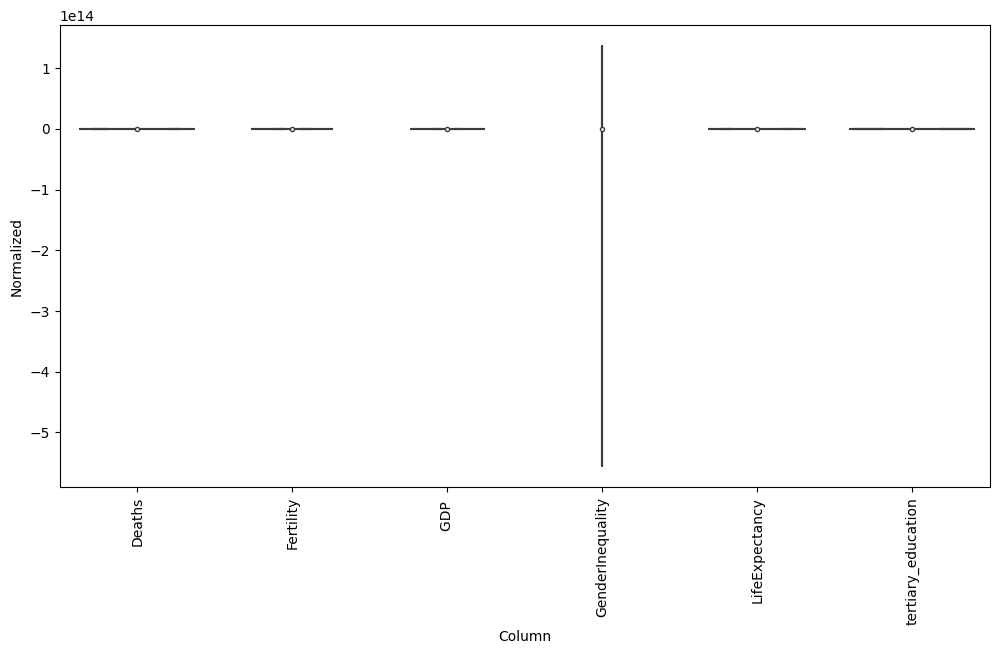

In [ ]:
df_std = (data - train_mean) / train_std

df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

# Data windowing

The models will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

  - The width (number of time steps) of the input and label windows.
  - The time offset between them.
  - Which features are used as inputs, labels, or both.

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

  - Single-output, and multi-output predictions.
  - Single-time-step and multi-time-step predictions.

The rest of this section defines a WindowGenerator class. This class can:

  -Handle the indexes and offsets as shown in the diagrams above.  
  -Split windows of features into (features, labels) pairs.  
  -Plot the content of the resulting windows.  
  -Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.

# 1. Indexes and offsets

Start by creating the WindowGenerator class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later.



In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns

    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Fertility'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Fertility']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Fertility'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Fertility']

In [ ]:
w3 = WindowGenerator(input_width=71, label_width=1, shift=20,
                     label_columns=['Fertility'])
w3

Total window size: 91
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
Label indices: [90]
Label column name(s): ['Fertility']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[20:20+w2.total_window_size]),
                           np.array(train_df[40:40+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 6)
Inputs shape: (3, 6, 6)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='Fertility', max_subplots=3):
    inputs, labels = self.example

    # Supposons que vous avez 6 éléments dans 'inputs' et 72 éléments dans 'years'
    #years = initial['Year'].values  # Obtenez toutes les années de votre DataFrame 'initial'

    # Rééchantillonnez 'years' pour avoir la même longueur que 'inputs'
    #years_new = np.linspace(years.min(), years.max(), len(inputs)+3)

    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))

    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)
        #plt.xlim(1950, years_new.max())

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Year')
    #plt.xlim(1950, years_new.max())
WindowGenerator.plot = plot


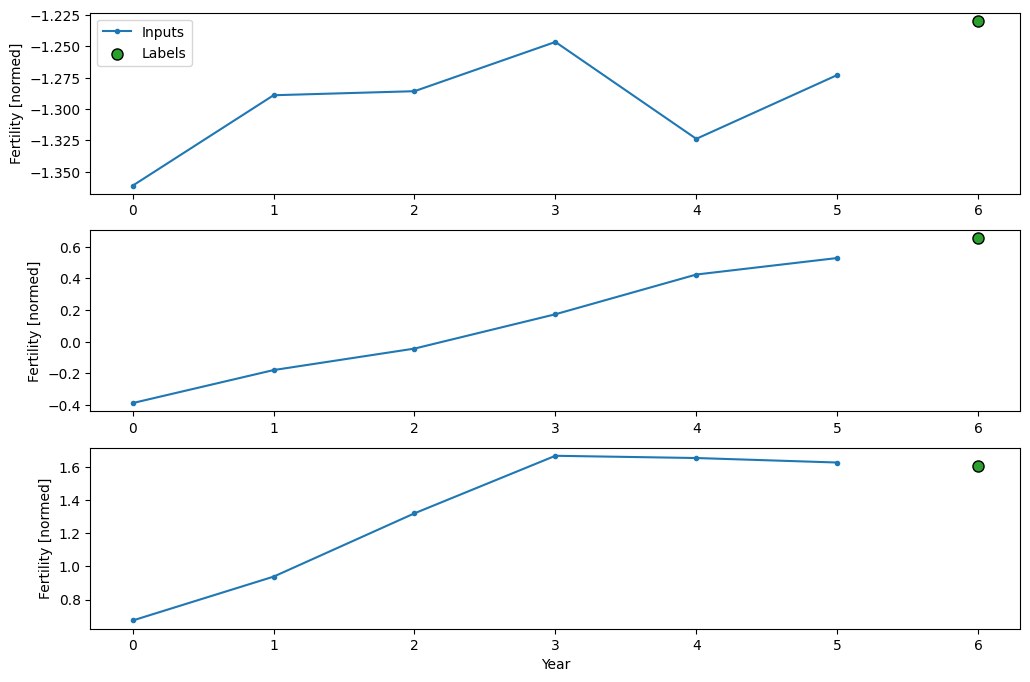

In [ ]:
w2.plot()

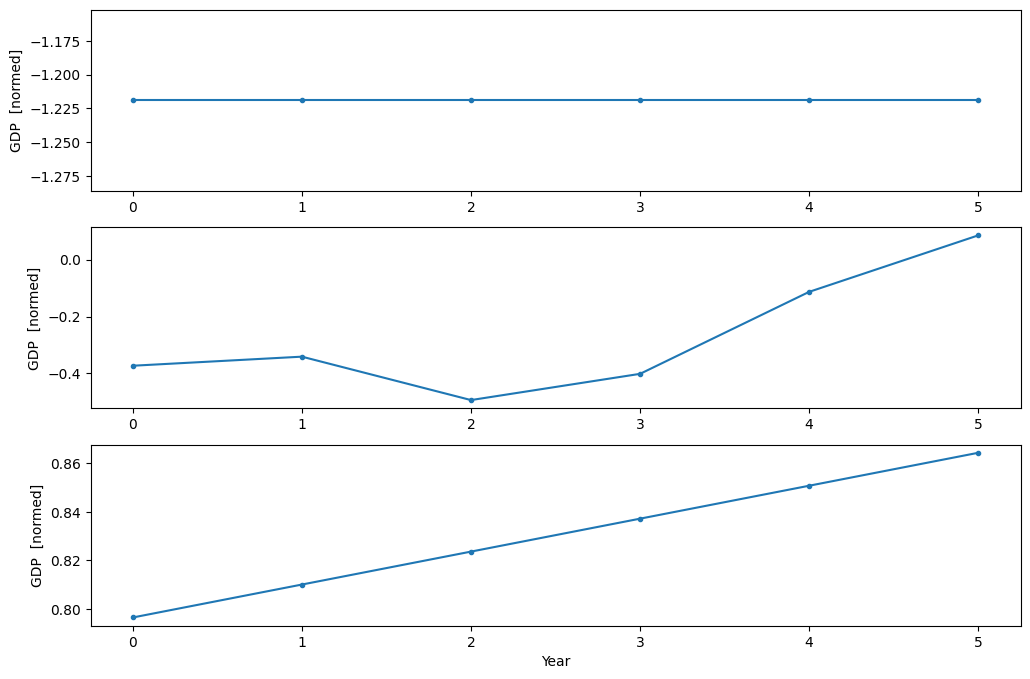

In [ ]:
w2.plot(plot_col='GDP ')

# <u >Create tf.data.Datasets </u>

Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

#### The WindowGenerator object holds training, validation, and test data.

Add properties for accessing them as tf.data.Datasets using the make_dataset method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Now, the WindowGenerator object gives you access to the tf.data.Dataset objects, so you can easily iterate over the data.

The Dataset.element_spec property tells you the structure, data types, and shapes of the dataset elements.

In [ ]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 6), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches:

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 6)
Labels shape (batch, time, features): (32, 1, 1)


# Single step models

The simplest model you can build on this sort of data is one that predicts a single feature's value—1 time step (one year) into the future based only on the current conditions.

So, start by building models to predict the  Fertility value one year into the future.


Configure a WindowGenerator object to produce these single-step (input, label) pairs:

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Fertility'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Fertility']

The window object creates tf.data.Datasets from the training, validation, and test sets, allowing you to easily iterate over batches of data.

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 6)
Labels shape (batch, time, features): (32, 1, 1)


# Baseline
Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict fertility one year into the future, given the current value of all features. The current values include the current fertility.

So, start with a model that just returns the current fertility as the prediction, predicting "No change". This is a reasonable baseline since fertility changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Instantiate and evaluate this model:

In [ ]:
baseline = Baseline(label_index=column_indices['Fertility'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 284ms/step - loss: 0.3716 - mean_absolute_error: 0.4021


That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

The WindowGenerator has a plot method, but the plots won't be very interesting with only a single sample.

So, create a wider WindowGenerator that generates windows 24 years of consecutive inputs and labels at a time. The new wide_window variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the time axis acts like the batch axis: each prediction is made independently with no interaction between time steps:

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Fertility'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Fertility']

This expanded window can be passed directly to the same baseline model without any code changes. This is possible because the inputs and labels have the same number of time steps, and the baseline just forwards the input to the output:

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (26, 24, 6)
Output shape: (26, 24, 1)


By plotting the baseline model's predictions, notice that it is simply the labels shifted right by one year:

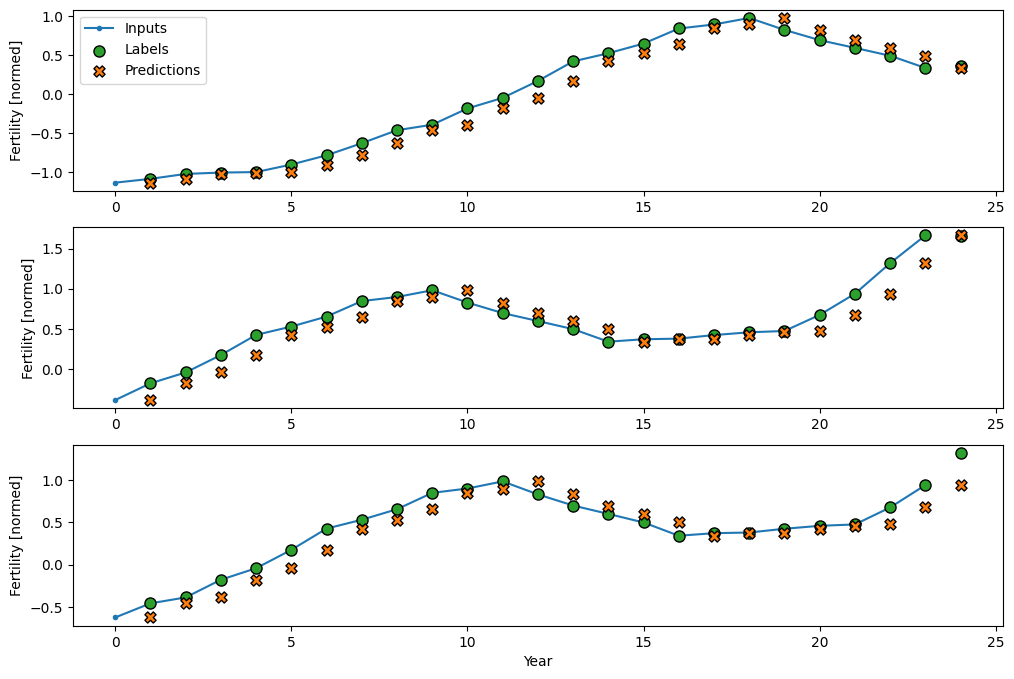

In [ ]:
wide_window.plot(baseline)

In the above plots of three examples the single step model is run over the course of 24 years. This deserves some explanation:

  - The blue Inputs line shows the input temperature at each time step. The model receives all features, this plot only shows the temperature.
  -The green Labels dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
  -The orange Predictions crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the Labels.


# Linear model
The simplest trainable model you can apply to this task is to insert linear transformation between the input and output. In this case the output from a time step only depends on that step:


A tf.keras.layers.Dense layer with no activation set is a linear model. The layer only transforms the last axis of the data from (batch, time, inputs) to (batch, time, units); it is applied independently to every item across the batch and time axes.

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 6)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Train the model and evaluate its performance:

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 1s 179ms/step - loss: 0.8460 - mean_absolute_error: 0.8151 - val_loss: 99827174992537705326313472.0000 - val_mean_absolute_error: 6386460655616.0000
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.8313 - mean_absolute_error: 0.8084 - val_loss: 98982258773729586733645824.0000 - val_mean_absolute_error: 6359377510400.0000
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 0.8187 - mean_absolute_error: 0.8024 - val_loss: 98103815597567501030916096.0000 - val_mean_absolute_error: 6331094794240.0000
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.8055 - mean_absolute_error: 0.7960 - val_loss: 97210412111961636881825792.0000 - val_mean_absolute_error: 6302201806848.0000
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.7933 - mean_absolute_error: 0.7901 - val_loss: 96330899024643276025102336.0000 - val_mean_absolute_error: 6273627062272.0000
Epoch 6/2

Like the baseline model, the linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecutive time steps. The time axis acts like another batch axis. There are no interactions between the predictions at each time step.



In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (26, 24, 6)
Output shape: (26, 24, 1)


Here is the plot of its example predictions on the wide_window, note how in many cases the prediction is clearly better than just returning the input temperature, but in a few cases it's worse:

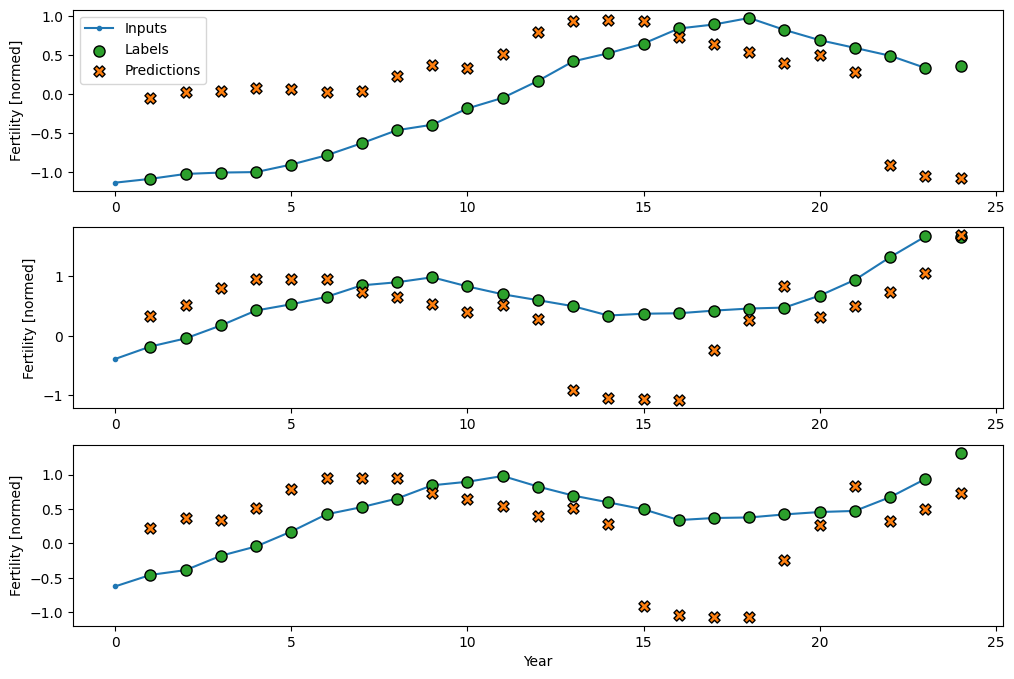

In [ ]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

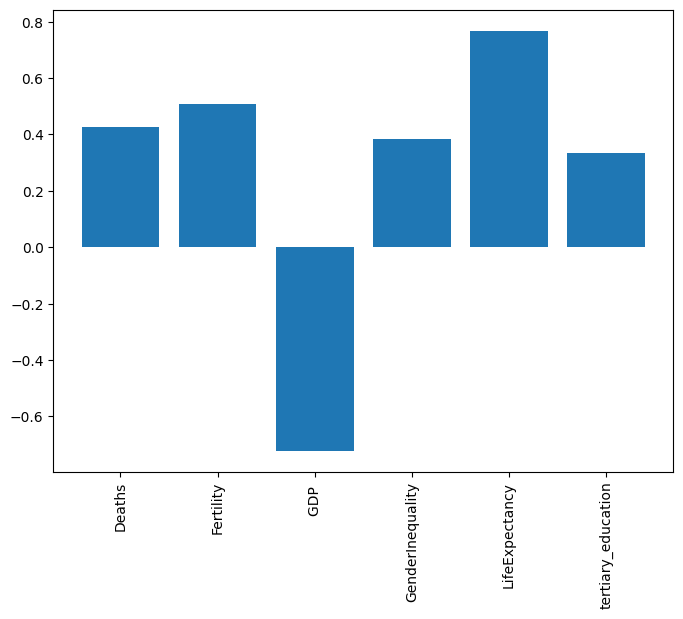

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Dense
Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

Here's a model similar to the linear model, except it stacks several a few Dense layers between the input and the output:

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
2/2 [==============================] - 3s 372ms/step - loss: 0.9517 - mean_absolute_error: 0.8814 - val_loss: 8969005847597128676802560.0000 - val_mean_absolute_error: 1901670039552.0000
Epoch 2/20
2/2 [==============================] - 0s 80ms/step - loss: 0.7468 - mean_absolute_error: 0.7769 - val_loss: 10979911359806060552519680.0000 - val_mean_absolute_error: 2117563056128.0000
Epoch 3/20
1/1 [==============================] - 0s 92ms/step - loss: 12972692369501820490350592.0000 - mean_absolute_error: 2312138129408.0000


Multi-step dense
A single-time-step model has no context for the current values of its inputs. It can't see how the input features are changing over time. To address this issue the model needs access to multiple time steps when making predictions:

Three time steps are used for each prediction.

The baseline, linear and dense models handled each time step independently. Here the model will take multiple time steps as input to produce a single output.

Create a WindowGenerator that will produce batches of three-hour inputs and one-hour labels:

Note that the Window's shift parameter is relative to the end of the two windows.

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Fertility'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Fertility']

Text(0.5, 1.0, 'Given 3 years of inputs, predict 1 year into the future.')

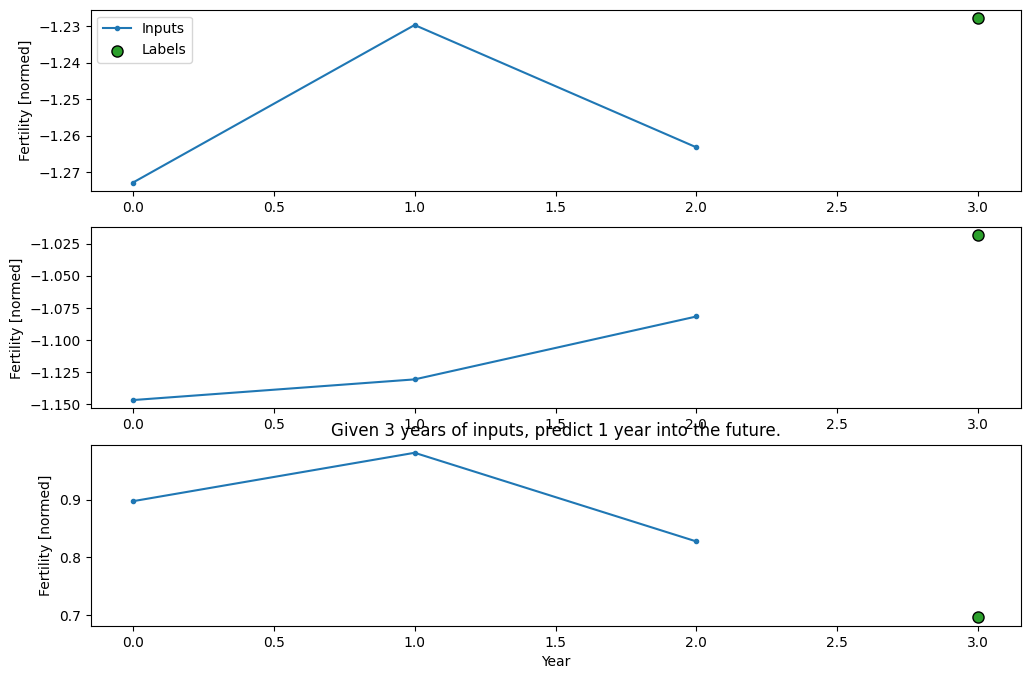

In [ ]:
conv_window.plot()
plt.title("Given 3 years of inputs, predict 1 year into the future.")

You could train a dense model on a multiple-input-step window by adding a tf.keras.layers.Flatten as the first layer of the model:

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

The main down-side of this approach is that the resulting model can only be executed on input windows of exactly this shape.

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 6)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 88ms/step - loss: 4153159624442831855157248.0000 - mean_absolute_error: 1277228351488.0000


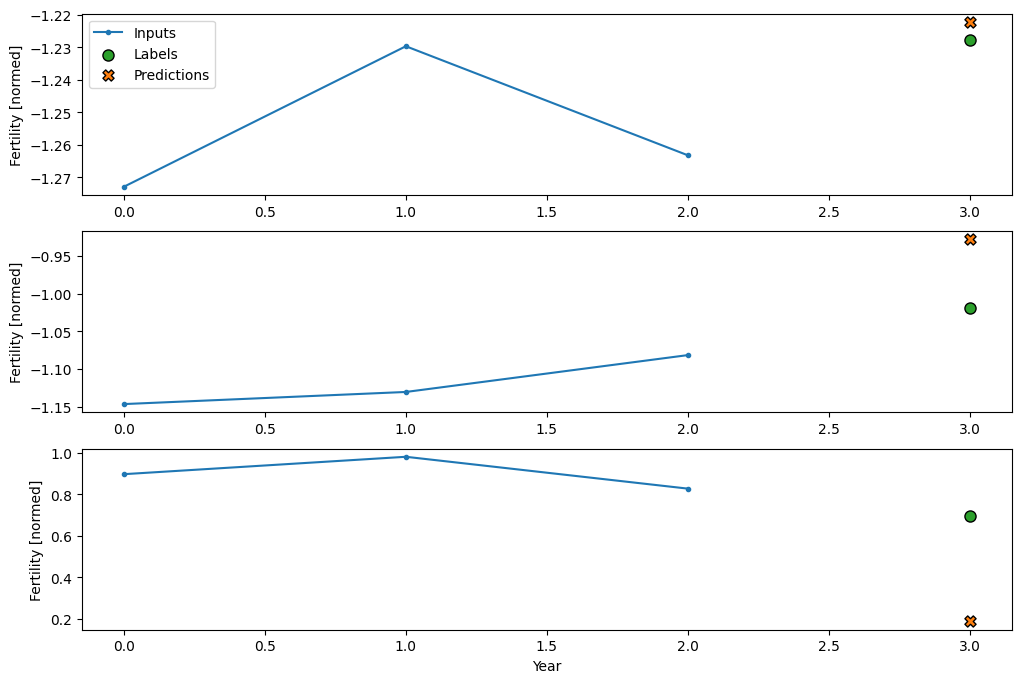

In [ ]:
conv_window.plot(multi_step_dense)

Run it on an example batch to check that the model produces outputs with the expected shape:

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (26, 24, 6)

ValueError:Exception encountered when calling layer 'sequential_2' (type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 18, but received input with shape (26, 144)

Call arguments received by layer 'sequential_2' (type Sequential):
  • inputs=tf.Tensor(shape=(26, 24, 6), dtype=float32)
  • training=None
  • mask=None


The convolutional models in the next section fix this problem.

# Convolution neural network
A convolution layer (tf.keras.layers.Conv1D) also takes multiple time steps as input to each prediction.

Below is the same model as multi_step_dense, re-written with a convolution.

Note the changes:

The tf.keras.layers.Flatten and the first tf.keras.layers.Dense are replaced by a tf.keras.layers.Conv1D.
The tf.keras.layers.Reshape is no longer necessary since the convolution keeps the time axis in its output.

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

Run it on an example batch to check that the model produces outputs with the expected shape:

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 6)
Output shape: (32, 1, 1)


Train and evaluate it on the conv_window and it should give performance similar to the multi_step_dense model.

In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 62ms/step - loss: 5281994581205808735846400.0000 - mean_absolute_error: 1073488527360.0000


The difference between this conv_model and the multi_step_dense model is that the conv_model can be run on inputs of any length. The convolutional layer is applied to a sliding window of inputs:

If you run it on wider input, it produces wider output:

In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (26, 24, 6)
Labels shape: (26, 24, 1)
Output shape: (26, 22, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Fertility'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Fertility']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (24, 26, 6)
Labels shape: (24, 24, 1)
Output shape: (24, 24, 1)


Now, you can plot the model's predictions on a wider window. Note the 3 input time steps before the first prediction. Every prediction here is based on the 3 preceding time steps:

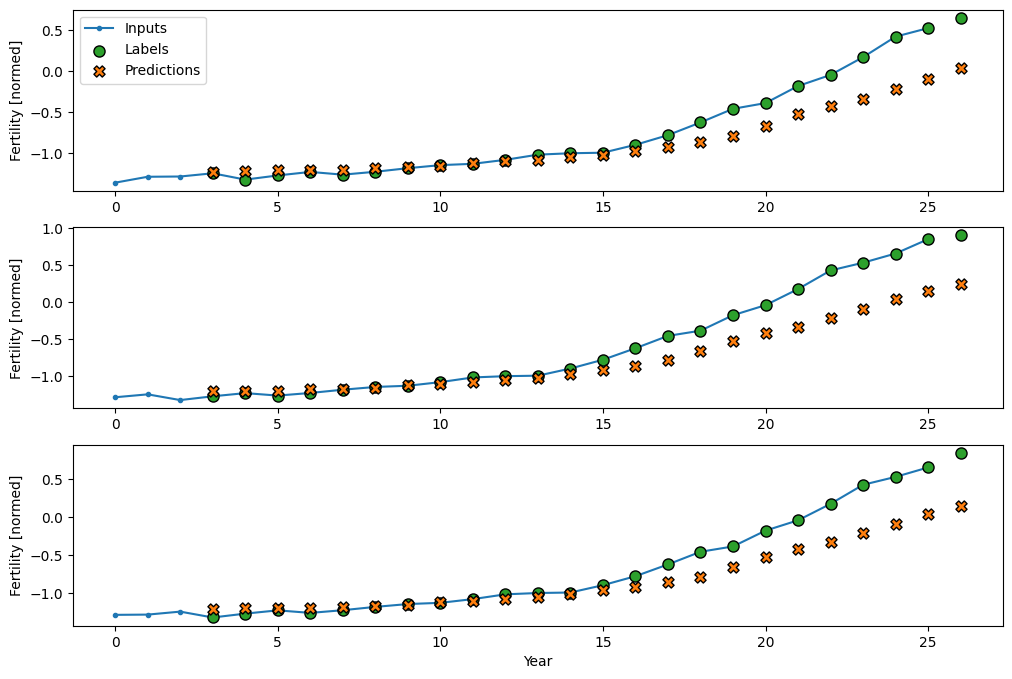

In [ ]:
wide_conv_window.plot(conv_model)

#Recurrent neural network
A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the Text generation with an RNN tutorial and the Recurrent Neural Networks (RNN) with Keras guide.

In this tutorial, you will use an RNN layer called Long Short-Term Memory (tf.keras.layers.LSTM).

An important constructor argument for all Keras RNN layers, such as tf.keras.layers.LSTM, is the return_sequences argument. This setting can configure the layer in one of two ways:

If False, the default, the layer only returns the output of the final time step, giving the model time to warm up its internal state before making a single prediction:


If True, the layer returns an output for each input. This is useful for:
Stacking RNN layers.
Training a model on multiple time steps simultaneously.

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

With return_sequences=True, the model can be trained on 24 hours of data at a time.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (26, 24, 6)
Output shape: (26, 24, 1)


In [ ]:
import math
history = compile_and_fit(lstm_model, wide_window)

clean = wide_window.val

for i, value in enumerate(clean):
    if math.isinf(value):
        clean[i] = 0
    else:
        clean[i] = int(value)

val_performance['LSTM'] = lstm_model.evaluate(clean)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.0153 - mean_absolute_error: 0.0826

1/1 [==============================] - 3s 3s/step - loss: 0.0153 - mean_absolute_error: 0.0826
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 0.0183 - mean_absolute_error: 0.1008

1/1 [==============================] - 0s 67ms/step - loss: 0.0183 - mean_absolute_error: 0.1008
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 0.0150 - mean_absolute_error: 0.0817

1/1 [==============================] - 0s 75ms/step - loss: 0.0150 - mean_absolute_error: 0.0817
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 0.0156 - mean_absolute_error: 0.0868

1/1 [==============================] - 0s 76ms/step - loss: 0.0156 - mean_absolute_error: 0.0868
Epoch 5/20
1/1 [==============================] - ETA: 0s - loss: 0.0163 - mean_absolute_error: 0.0927

1/1 [==============================] - 0s 76ms/step - loss: 0.0163 - mean_absolute_error: 0.0927
Epoch 6/20
1/1 [==============================] - ETA: 0s - loss: 0.0153 - mean_absolute_error: 0.0867

1/1 [==============================] - 0s 86ms/step - loss: 0.0153 - mean_absolute_error: 0.0867
Epoch 7/20
1/1 [==============================] - ETA: 0s - loss: 0.0142 - mean_absolute_error: 0.0795

1/1 [==============================] - 0s 91ms/step - loss: 0.0142 - mean_absolute_error: 0.0795
Epoch 8/20
1/1 [==============================] - ETA: 0s - loss: 0.0141 - mean_absolute_error: 0.0792

1/1 [==============================] - 0s 86ms/step - loss: 0.0141 - mean_absolute_error: 0.0792
Epoch 9/20
1/1 [==============================] - ETA: 0s - loss: 0.0145 - mean_absolute_error: 0.0829

1/1 [==============================] - 0s 81ms/step - loss: 0.0145 - mean_absolute_error: 0.0829
Epoch 10/20
1/1 [==============================] - ETA: 0s - loss: 0.0144 - mean_absolute_error: 0.0832

1/1 [==============================] - 0s 79ms/step - loss: 0.0144 - mean_absolute_error: 0.0832
Epoch 11/20
1/1 [==============================] - ETA: 0s - loss: 0.0138 - mean_absolute_error: 0.0797

1/1 [==============================] - 0s 80ms/step - loss: 0.0138 - mean_absolute_error: 0.0797
Epoch 12/20
1/1 [==============================] - ETA: 0s - loss: 0.0132 - mean_absolute_error: 0.0761

1/1 [==============================] - 0s 87ms/step - loss: 0.0132 - mean_absolute_error: 0.0761
Epoch 13/20
1/1 [==============================] - ETA: 0s - loss: 0.0130 - mean_absolute_error: 0.0760

1/1 [==============================] - 0s 76ms/step - loss: 0.0130 - mean_absolute_error: 0.0760
Epoch 14/20
1/1 [==============================] - ETA: 0s - loss: 0.0131 - mean_absolute_error: 0.0778

1/1 [==============================] - 0s 71ms/step - loss: 0.0131 - mean_absolute_error: 0.0778
Epoch 15/20
1/1 [==============================] - ETA: 0s - loss: 0.0131 - mean_absolute_error: 0.0786

1/1 [==============================] - 0s 86ms/step - loss: 0.0131 - mean_absolute_error: 0.0786
Epoch 16/20
1/1 [==============================] - ETA: 0s - loss: 0.0127 - mean_absolute_error: 0.0769

1/1 [==============================] - 0s 79ms/step - loss: 0.0127 - mean_absolute_error: 0.0769
Epoch 17/20
1/1 [==============================] - ETA: 0s - loss: 0.0123 - mean_absolute_error: 0.0742

1/1 [==============================] - 0s 73ms/step - loss: 0.0123 - mean_absolute_error: 0.0742
Epoch 18/20
1/1 [==============================] - ETA: 0s - loss: 0.0120 - mean_absolute_error: 0.0725

1/1 [==============================] - 0s 72ms/step - loss: 0.0120 - mean_absolute_error: 0.0725
Epoch 19/20
1/1 [==============================] - ETA: 0s - loss: 0.0119 - mean_absolute_error: 0.0726

1/1 [==============================] - 0s 81ms/step - loss: 0.0119 - mean_absolute_error: 0.0726
Epoch 20/20
1/1 [==============================] - ETA: 0s - loss: 0.0119 - mean_absolute_error: 0.0732

1/1 [==============================] - 0s 69ms/step - loss: 0.0119 - mean_absolute_error: 0.0732


OverflowError: ignored

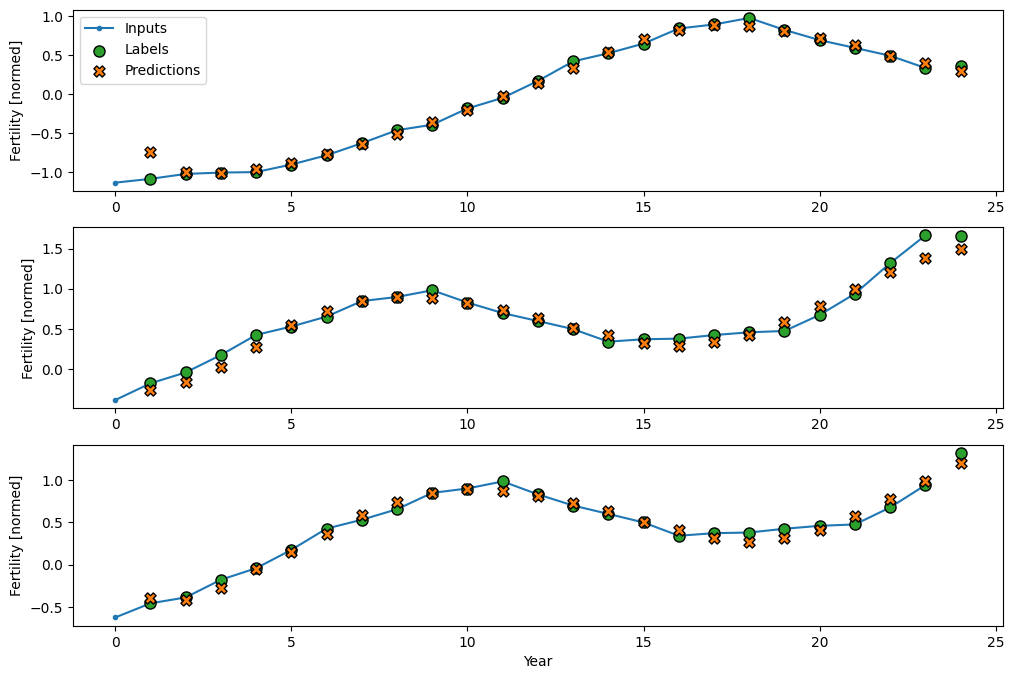

In [ ]:
wide_window.plot(lstm_model)

Performance
With this dataset typically each of the models does slightly better than the one before it:

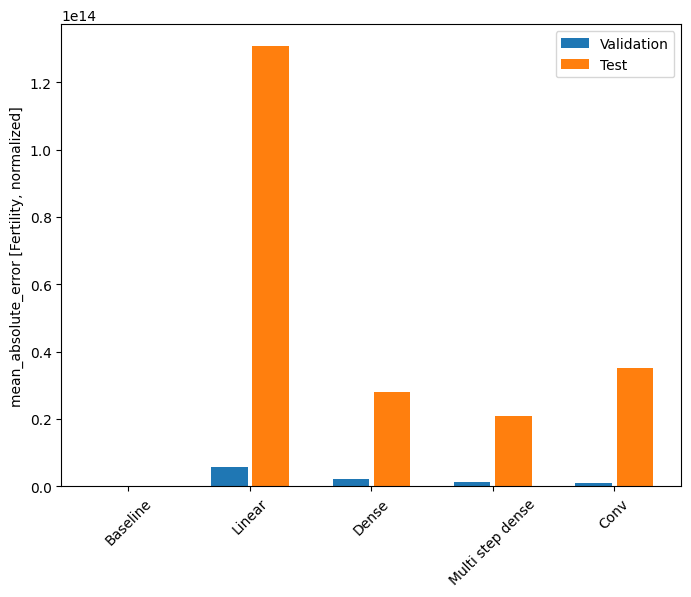

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Fertility, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0000
Linear      : 107562833805312.0000
Dense       : 4986925744128.0000
Multi step dense: 19052514770944.0000
Conv        : 24847421800448.0000


# Multi-output models
The models so far all predicted a single output feature, T (degC), for a single time step.

All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the labels (example_labels):

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (26, 24, 6)
Labels shape (batch, time, features): (26, 24, 6)


Note above that the features axis of the labels now has the same depth as the inputs, instead of 1.

Baseline
The same baseline model (Baseline) can be used here, but this time repeating all features instead of selecting a specific label_index:

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}



val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

OverflowError: ignored

# Dense

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 57ms/step - loss: 234153340071262571827560448.0000 - mean_absolute_error: 4872108769280.0000


# RNN

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

OverflowError: ignored

# Advanced: Residual connections
The Baseline model from earlier took advantage of the fact that the sequence doesn't change drastically from time step to time step. Every model trained in this tutorial so far was randomly initialized, and then had to learn that the output is a a small change from the previous time step.

While you can get around this issue with careful initialization, it's simpler to build this into the model structure.

It's common in time series analysis to build models that instead of predicting the next value, predict how the value will change in the next time step. Similarly, residual networks—or ResNets—in deep learning refer to architectures where each layer adds to the model's accumulating result.

That is how you take advantage of the knowledge that the change should be small.

Essentially, this initializes the model to match the Baseline. For this task it helps models converge faster, with slightly better performance.

This approach can be used in conjunction with any model discussed in this tutorial.

Here, it is being applied to the LSTM model, note the use of the tf.initializers.zeros to ensure that the initial predicted changes are small, and don't overpower the residual connection. There are no symmetry-breaking concerns for the gradients here, since the zeros are only used on the last layer.

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

OverflowError: ignored

# Performance
Here is the overall performance for these multi-output models.

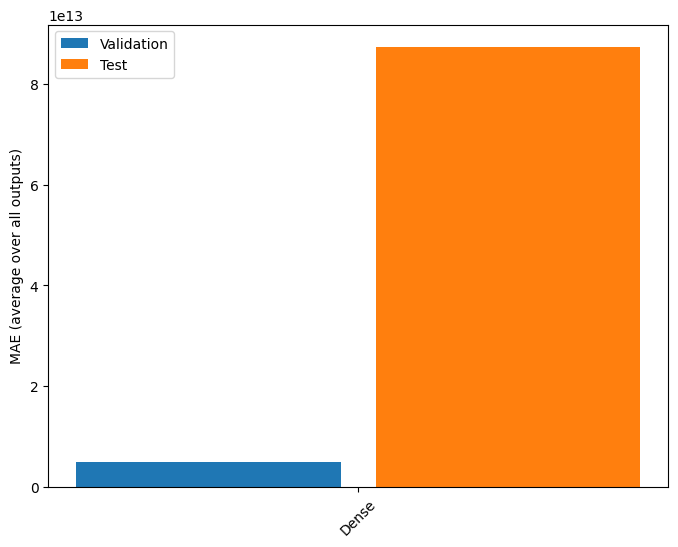

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Dense          : 87494213238784.0000
